In [31]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [32]:
%%time
# Load BES Panel for Wave 8
parsed_data = pd.read_pickle("man_of_2017_parsed.pkl")
#(31409, 733)

# BES_Panel = pd.read_stata("../BES_analysis_data/BES2015_W8_v1.6.dta")

print( parsed_data.shape )

(313, 83)
Wall time: 117 ms


In [33]:
numerics_only = pd.DataFrame()
for col in parsed_data.columns:
    # drop object and datetime64[ns] silently
    if str( parsed_data[col].dtype ) == 'category':
        numerics_only[col] = parsed_data[col].cat.codes.astype('float')
    elif ( str( parsed_data[col].dtypes ) == 'bool') | ( str( parsed_data[col].dtypes ) == 'int64' ) :
        numerics_only[col] = parsed_data[col].astype('float')


In [34]:
non_ordinal = [ "how_would_you_describe_your" , "where_do_you_live" ]
pol_identity = parsed_data.columns[parsed_data.dtypes==bool]

In [35]:
parsed_data[ parsed_data.columns[parsed_data.dtypes==bool] ].sum()

socialist                163
liberal                  181
feminist                 210
egalitarian              105
libertarian               36
anarchist                 24
moderate                 104
conservative              25
men_s_rights_activist     10
dtype: int64

In [36]:
temp = StandardScaler().fit_transform( numerics_only )
man_std = pd.DataFrame(temp,
                       columns = numerics_only.columns,
                       index   = numerics_only.index)
# man_std.drop(non_ordinal, axis=1,inplace=True)
# man_std.drop(pol_identity, axis=1,inplace=True)

In [37]:
# man_std.hist(figsize=(30,30))

(313, 2)
explained variance ratio (first two components): [ 0.15913563  0.07136959]


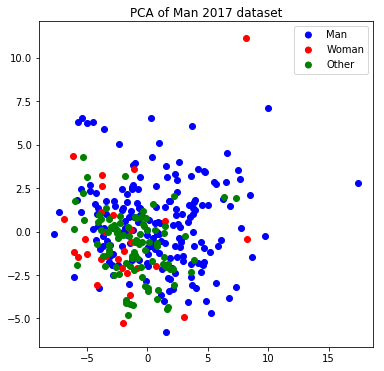

In [111]:
# Leave = BES_std["euRefVote"]>0
# Stay =  BES_std["euRefVote"]<0

pca = PCA(n_components=2)
X_r = pca.fit(man_std).transform(man_std)

print( X_r.shape )

print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_) )

plt.figure(figsize=(6,6))
#plt.scatter( X_r[:, 0 ] ,X_r[:, 1 ] )

# Male, Female, Other
colour_array = ['b','r','g']
label_array = ["Man", "Woman", "Other"]
numerics_only["how_would_you_describe_your"]

for y in [0.0, 1.0, 2.0]:
    plt.scatter(X_r[ np.ix_(numerics_only["how_would_you_describe_your"]== y, [0]) ],
                X_r[ np.ix_(numerics_only["how_would_you_describe_your"] ==y, [1]) ],
                c    = colour_array[int(y)],
                label = label_array[int(y)] )
# plt.scatter( X_r[ np.ix_(Leave, [0]) ] , X_r[ np.ix_(Leave, [1]) ], c='r', label="Leave" )
# plt.scatter( X_r[ np.ix_(Stay , [0]) ] , X_r[ np.ix_(Stay , [1]) ], c='b', label="Stay"  )

plt.legend()
plt.title('PCA of Man 2017 dataset')
plt.show()

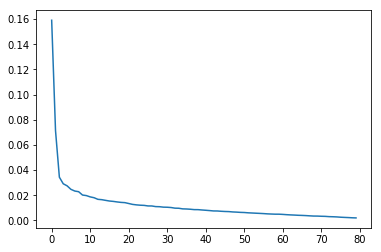

In [57]:
plt.plot( pca.explained_variance_ratio_)

,0,1
72,-0.124051,feminist
0,-0.0715259,how_would_you_describe_your
70,-0.0596694,socialist
3,-0.0435291,do_you_believe_that_a_secret
25,0.0413909,seeks_advice_when_he_wants_to
59,0.0431758,eats_whatever_food_he_wants
7,0.0497514,appreciates_beauty_in_all_of
60,0.0543584,puts_the_needs_and_feelings_of
78,0.0547274,men_s_rights_activist
40,0.0578584,does_not_need_to_prove_himself


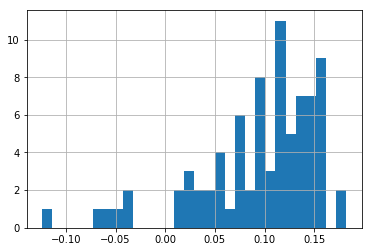

In [58]:
comp_0 = pd.DataFrame([ pca.components_[0], man_std.columns ]).T
comp_0[0].hist(bins=30)
# comp_0_vars = comp_0[comp_0[0].abs()>.12].sort_values(by=0).index
comp_0[comp_0[0].abs()>.04].sort_values(by=0)

,0,1
8,-0.244055,uses_his_wealth_and_social
66,-0.23999,helps_other_men_to_be_good_men
25,-0.23383,seeks_advice_when_he_wants_to
7,-0.21253,appreciates_beauty_in_all_of
64,-0.187605,cherishes_and_values_the
17,-0.176208,shows_sportsmanship_and_does
67,-0.158555,does_not_speak_ill_of_others
72,-0.153231,feminist
37,-0.152462,does_not_lie
9,-0.144241,does_what_he_says_he_will_do


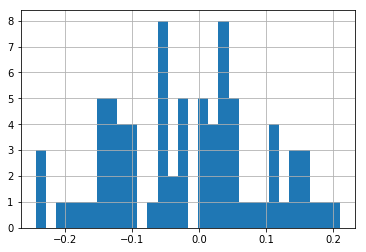

In [59]:
comp_1 = pd.DataFrame([ pca.components_[1], man_std.columns ]).T
comp_1[0].hist(bins=30)
comp_1_vars = comp_1[comp_1[0].abs()>.09].sort_values(by=0).index
comp_1[comp_1[0].abs()>.09].sort_values(by=0)

number of estimated clusters : 3


C:\ANACON~1\envs\man_2017\lib\site-packages\matplotlib\axes\_axes.py:546: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


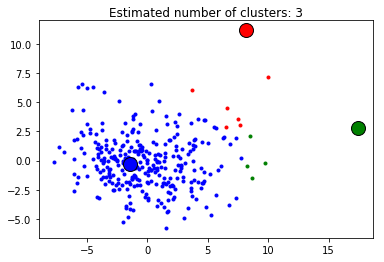

In [115]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs


X = X_r


# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [117]:
lab2 = labels==2
lab1 = labels==1


In [120]:
parsed_data[lab1]

,timestamp,how_would_you_describe_your,which_of_the_following_would,where_do_you_live,what_is_your_age,do_you_believe_that_a_secret,has_the_confidence_that_if,cultivates_as_many_interests_as,knows_everything_about,appreciates_beauty_in_all_of,...,socialist,liberal,feminist,egalitarian,libertarian,anarchist,moderate,conservative,men_s_rights_activist,feedback_length
87,2016-11-19 12:23:30,Other,Men's Rights Activist,Europe,26 - 40,No,Desirable,Neutral,Essential,Desirable,...,False,False,False,False,False,False,False,False,True,0
140,2016-11-19 17:02:44,Man,Conservative,Europe,26 - 40,No,Neutral,Undesirable,Neutral,Essential,...,False,False,False,False,False,False,False,True,False,0
222,2016-11-29 09:48:30,Man,Liberal,Europe,18 - 25,No,Essential,Essential,Essential,Essential,...,False,True,False,False,False,False,False,False,False,0
281,2016-12-14 13:29:19,Man,Conservative,Europe,26 - 40,No,Desirable,Desirable,Desirable,Essential,...,False,False,False,False,False,False,False,True,False,0
310,2016-12-15 17:15:50,Man,"Socialist, Liberal, Egalitarian",Europe,18 - 25,No,Essential,Desirable,Essential,Desirable,...,True,True,False,True,False,False,False,False,False,0


In [131]:
pca1_head = comp_0[comp_0[0].abs()>.04].sort_values(by=0)[1].head(5).values
pca1_tail = comp_0[comp_0[0].abs()>.04].sort_values(by=0)[1].tail(5).values

In [130]:
parsed_data[lab1][pca1_tail]

,may_take_a_beating_of_whatever,cultivates_practical_skills_and,is_willing_to_endure_suffering,is_quick_to_respond_in_a_time,maintains_his_physical_strength
87,Essential,Essential,Essential,Essential,Essential
140,Essential,Essential,Essential,Essential,Essential
222,Essential,Essential,Essential,Essential,Essential
281,Desirable,Desirable,Essential,Desirable,Neutral
310,Essential,Desirable,Desirable,Essential,Essential


In [133]:
parsed_data[lab1][pca1_head]

,feminist,how_would_you_describe_your,socialist,do_you_believe_that_a_secret,seeks_advice_when_he_wants_to
87,False,Other,False,No,Essential
140,False,Man,False,No,Essential
222,False,Man,False,No,Essential
281,False,Man,False,No,Desirable
310,False,Man,True,No,Essential


In [134]:
parsed_data[lab2]

,timestamp,how_would_you_describe_your,which_of_the_following_would,where_do_you_live,what_is_your_age,do_you_believe_that_a_secret,has_the_confidence_that_if,cultivates_as_many_interests_as,knows_everything_about,appreciates_beauty_in_all_of,...,socialist,liberal,feminist,egalitarian,libertarian,anarchist,moderate,conservative,men_s_rights_activist,feedback_length
63,2016-11-19 11:36:31,Man,Moderate,Europe,26 - 40,No,Undesirable,Neutral,Essential,Desirable,...,False,False,False,False,False,False,True,False,False,0
104,2016-11-19 12:54:28,Man,"Egalitarian, Moderate",Europe,26 - 40,No,Desirable,Neutral,Desirable,Desirable,...,False,False,False,True,False,False,True,False,False,15705
133,2016-11-19 15:36:18,Man,"Socialist, Liberal, Egalitarian",Europe,26 - 40,No,Desirable,Essential,Desirable,Desirable,...,True,True,False,True,False,False,False,False,False,45
207,2016-11-20 17:32:38,Man,Liberal,Northern America,41 - 65,No,Desirable,Desirable,Neutral,Desirable,...,False,True,False,False,False,False,False,False,False,0
219,2016-11-22 12:00:10,Man,Socialist,Asia,41 - 65,No,Neutral,Essential,Desirable,Undesirable,...,True,False,False,False,False,False,False,False,False,0
232,2016-12-13 13:04:40,Man,Moderate,Europe,26 - 40,No,Essential,Undesirable,Neutral,Neutral,...,False,False,False,False,False,False,True,False,False,0
311,2016-12-16 08:41:35,Other,Feminist,Oceania,18 - 25,No,Essential,Undesirable,Desirable,Neutral,...,False,False,True,False,False,False,False,False,False,0


In [135]:
pca2_head = comp_1[comp_1[0].abs()>.04].sort_values(by=0)[1].head(5).values
pca2_tail = comp_1[comp_1[0].abs()>.04].sort_values(by=0)[1].tail(5).values

In [136]:
parsed_data[lab2][pca2_tail]

,does_not_rely_on_the_kindness,accepts_survival_of_the_fittest,puts_his_bonds_with_other_men,does_man_s_work_and_lets_women,keeps_his_feelings_to_himself
63,Essential,Desirable,Undesirable,Neutral,Essential
104,Desirable,Desirable,Neutral,Neutral,Neutral
133,Essential,Essential,Essential,Essential,Desirable
207,Essential,Desirable,Desirable,Neutral,Neutral
219,Desirable,Neutral,Desirable,Desirable,Neutral
232,Essential,Desirable,Neutral,Neutral,Neutral
311,Desirable,Essential,Essential,Desirable,Desirable


In [137]:
parsed_data[lab2][pca2_head]

,uses_his_wealth_and_social,helps_other_men_to_be_good_men,seeks_advice_when_he_wants_to,appreciates_beauty_in_all_of,cherishes_and_values_the
63,Desirable,Neutral,Desirable,Desirable,Neutral
104,Neutral,Desirable,Essential,Desirable,Desirable
133,Desirable,Desirable,Undesirable,Desirable,Neutral
207,Neutral,Desirable,Desirable,Desirable,Neutral
219,Desirable,Desirable,Desirable,Undesirable,Essential
232,Desirable,Desirable,Desirable,Neutral,Essential
311,Neutral,Undesirable,Undesirable,Neutral,Neutral
